In [3]:
# Visualize opioid-related keywords from tweets
# Search Twitter for tweets related to opioids in the past 7 days
import tweepy

# Read API tokens from untracked file.
twitter_tokens = list(open("twitter_tokens.txt"))
consumer_key = twitter_tokens[0].replace('\n', '')
consumer_secret = twitter_tokens[1].replace('\n', '')

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

api = tweepy.API(auth)

# Searching via REST API
query = 'opioid'
max_tweets = 1000
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]

To-do: Set up Stream Listener

```python
class StreamListener(tweepy.StreamListener):

    def on_status(self, status):
        if status.retweeted_status or status.lang not 'en':
            return
        print(status.text)
        
    def on_error(self, status_code):
        if status_code == 420:
            return False

stream_listener = StreamListener()
stream = tweepy.Stream(auth=api.auth, listener=stream_listener)
stream.filter(track=['opioid','heroin','fentanyl','methadone'])
```

In [5]:
import pandas as pd

# Hat tip to Piyush Agarwal  
# http://blog.impiyush.com/2015/03/data-analysis-using-twitter-api-and.html
def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]

    return DataSet

#Pass the tweets list to the above function to create a DataFrame
twitter_data = toDataFrame(searched_tweets)

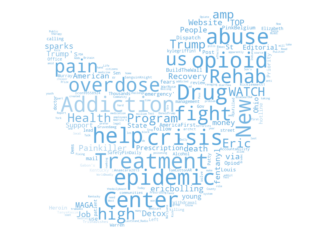

In [7]:
# Word Cloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
import re

# In following Word Cloud documentation, we'll read from .txt file
# Delete old tweets before appending new tweets
open('data/tweets.txt', 'w').close()

# Write data to .txt file for word cloud
with open('data/tweets.txt', 'a') as the_file:
    for index, row in twitter_data.iterrows():
        the_file.write(row['tweetText']+ ' \n')

# Read the whole text (For now use tweets_initial)
text = open('data/tweets_initial.txt').read()

# Remove links
text = re.sub(r'http\S+', '', text)

# Read mask image
twitter_mask = np.array(Image.open('twitter_word_cloud_mask.png'))

# Do not include common words in word cloud
stopwords = set(STOPWORDS)
stopwords.add("RT")

# Create coloring from image
image_colors = ImageColorGenerator(twitter_mask)

# Generate word cloud
wc = WordCloud(background_color="white", max_words=200, mask=twitter_mask,
               stopwords=stopwords, max_font_size=70)
wc.generate(text)

# show
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()